In [5]:
from __future__ import division
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import os
import matplotlib
import numpy as np
import random
from numpy import linalg as LA
from PIL import Image
import sys
import itertools
from skimage import filters
from scipy import ndimage
# import tensorflow as tf
# import keras

In [4]:
cap = cv2.VideoCapture('test.avi')

In [5]:
# while True:
#     ret, frame = cap.read()
#     gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#     cv2.imshow('frame',frame)
#     cv2.imshow('grayF',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#          break

# cap.release()
# cv2.destroyAllWindows()

In [2]:
# import numpy as np
# import cv2

# cap = cv2.VideoCapture('test.avi')

# while(cap.isOpened()):
#     ret, frame = cap.read()

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     cv2.imshow('frame',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()

In [4]:
'''
Using OpenCV takes a mp4 video and produces a number of images.
Requirements
----
You require OpenCV 3.2 to be installed.
Run
----
Open the main.py and edit the path to the video. Then run:
$ python main.py
Which will produce a folder called data with the images. There will be 2000+ images for example.mp4.
'''
X = []

# Playing video from file:
cap = cv2.VideoCapture('test.avi')

# try:
#     if not os.path.exists('data'):
#         os.makedirs('data')
# except OSError:
#     print ('Error: Creating directory of data')

currentFrame = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret: break
    # Saves image of the current frame in jpg file
    X.append(frame)
#     name = './data/frame' + str(currentFrame) + '.jpg'
#     print ('Creating...' + name)
#     cv2.imwrite(name, frame)

# #     To stop duplicate images
    currentFrame += 1

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

Creating..../data/frame534.jpg
Creating..../data/frame535.jpg
Creating..../data/frame536.jpg
Creating..../data/frame537.jpg
Creating..../data/frame538.jpg
Creating..../data/frame539.jpg
Creating..../data/frame540.jpg
Creating..../data/frame541.jpg
Creating..../data/frame542.jpg
Creating..../data/frame543.jpg
Creating..../data/frame544.jpg
Creating..../data/frame545.jpg
Creating..../data/frame546.jpg
Creating..../data/frame547.jpg
Creating..../data/frame548.jpg
Creating..../data/frame549.jpg
Creating..../data/frame550.jpg
Creating..../data/frame551.jpg
Creating..../data/frame552.jpg
Creating..../data/frame553.jpg
Creating..../data/frame554.jpg


In [21]:
X = np.array(X)

In [22]:
X.shape

(555, 120, 160, 3)

In [4]:
len(X[2][0])

160

In [6]:
blur = cv2.GaussianBlur(X[17],(5,5),0)

In [5]:
for i in range(len(X)):
    X[i] = cv2.GaussianBlur(X[i],(5,5),0)

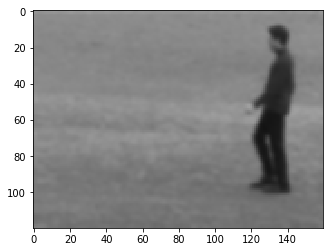

In [13]:
plt.imshow(blur)
plt.show()

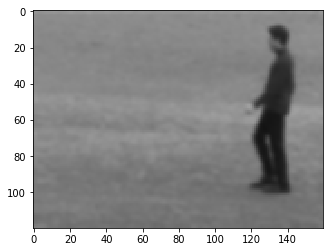

In [6]:
plt.imshow(X[17])
plt.show()

In [13]:
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)


img = cv2.cvtColor(X[17], cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

# cv2.imshow('image', img)
# cv2.imshow('filtered image', filtered_img)

h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(filtered_img, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)

In [20]:
g_kernel = cv2.getGaborKernel((1,1, 5), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

TypeError: function takes exactly 2 arguments (3 given)

In [19]:
g_kernel

array([[-0.19248143,  0.22732863,  0.6183222 ,  0.89152646,  0.9844964 ],
       [ 0.22732863,  0.6207422 ,  0.89851874,  0.9961014 ,  0.89152646],
       [ 0.6183222 ,  0.89851874,  1.        ,  0.89851874,  0.6183222 ],
       [ 0.89152646,  0.9961014 ,  0.89851874,  0.6207422 ,  0.22732863],
       [ 0.9844964 ,  0.89152646,  0.6183222 ,  0.22732863, -0.19248143]],
      dtype=float32)

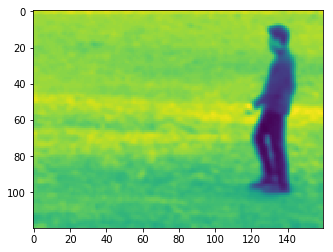

In [15]:
plt.imshow(img)
plt.show()

In [30]:


# Create a 3x3 Gabor filter
params = {'ksize':(3, 3), 'sigma':1.0, 'theta': 0, 'lambd':15.0, 'gamma':0.02}
filter = cv2.getGaborKernel(**params)
# make the filter to have 4 dimensions.
filter = tf.expand_dims(filter, 2)
filter = tf.expand_dims(filter, 3)

# Apply the filter on `image`
answer = tf.conv2d(X[17], filter, strides=[1, 1, 1, 1], padding='SAME')

AttributeError: module 'tensorflow' has no attribute 'conv2d'

In [40]:
keras.layers.Conv2D(filter, (3, 3), strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [4]:
cap = cv2.VideoCapture('test.avi')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

while(1):
    ret,frame = cap.read()
    if not ret: break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    if len(frame) == 0:
        break
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

#     cv2.imshow('frame',img)
#     k = cv2.waitKey(30) & 0xff
#     if k == 27:
#         break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

# cv2.destroyAllWindows()
# cap.release()

TypeError: 'NoneType' object is not subscriptable

In [11]:
p0

array([], shape=(0, 1, 2), dtype=float32)

In [2]:
X = []
XX = []
cap = cv2.VideoCapture("test.avi")

ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    if not ret: break
#     frame2 = cv2.resize(frame2,(50,50))
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     print(flow.shape)
    X.append(next)
    
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    o = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
#     print(o.shape)
    XX.append(o)
    frame2 = cv2.Laplacian(frame2,cv2.CV_64F)
    cv2.imshow('frame2',o)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png',frame2)
        cv2.imwrite('opticalhsv.png',rgb)
    prvs = next

cap.release()
cv2.destroyAllWindows()
X = np.array(X)
XX = np.array(XX)

In [5]:
print(X.shape)
print(XX.shape)

(554, 120, 160)
(554, 120, 160)


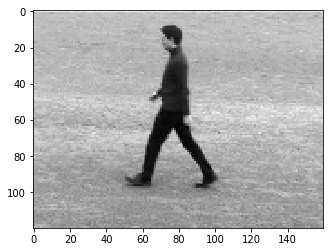

In [6]:
plt.imshow(X[37],'gray')
plt.show()

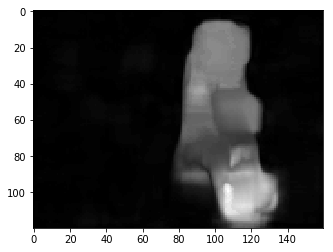

In [7]:
plt.imshow(XX[197],'gray')
plt.show()

In [7]:
c = XX[37] - XX[48]

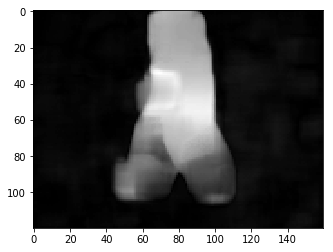

In [8]:
plt.imshow(XX[37],'gray')
plt.show()

In [59]:
XX[87][0].shape

(160,)

In [63]:
sum(sum(XX[107]/XX[107].shape[1]))/(XX[107].shape[0])

25.696302083333332

In [65]:
sum(sum(XX[197]/XX[197].shape[1]))/(XX[197].shape[0])

9.95609375

In [84]:
edges = filters.sobel(X[37])

In [17]:
laplacian = cv2.Laplacian(X[37],cv2.CV_64F)

In [81]:
def read_data(directory,count):
    dataset = []
    label = []
    for root, dirs, files in os.walk(directory):
        ext = ['.avi']
        if not (root == directory):
            key = root.split('\\')[1]
    #             dataset[key] = []
        c = count
        for name in files:
            filename, file_extension = os.path.splitext(name)
            if file_extension not in ext:
                continue
            if 'd1' in name.split('_'):
                print(key,name)
                XX = []
                cap = cv2.VideoCapture(directory+'/'+key+'/'+name)
                ret, frame1 = cap.read()
                prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
                hsv = np.zeros_like(frame1)
                hsv[...,1] = 255

                while(1):
                    ret, frame2 = cap.read()
                    if not ret: break
                #     frame2 = cv2.resize(frame2,(50,50))
                    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

                    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
                #     print(flow.shape)

                    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

                    hsv[...,0] = ang*180/np.pi/2
                    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
                    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
                    o = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
                #     print(o.shape)
                    XX.append(o)
                    frame2 = cv2.Laplacian(frame2,cv2.CV_64F)
#                     cv2.imshow('frame2',o)
#                     k = cv2.waitKey(30) & 0xff
#                     if k == 27:
#                         break
#                     elif k == ord('s'):
#                         cv2.imwrite('opticalfb.png',frame2)
#                         cv2.imwrite('opticalhsv.png',rgb)
                    prvs = next
                XX = np.array(X)
                lXX = []
                for i in range(len(XX)):
                    lXX.append(cv2.Laplacian(XX[i],cv2.CV_64F))
                lXX = np.array(lXX)
                lXX[lXX<0]=0
                z = []
                for i in range(len(lXX)):
                    z.append((i,np.mean(lXX[i]))) 
                z.sort(key=lambda x: x[1])
                z = z[0:150]
                zz = []
                for i in z:
                    zz.append(i[0])
                f = []
                for i in range(len(lXX)):
                    if i in zz:
                        f.append(cv2.resize(lXX[i],(50,50)))
                f = np.array(f)
                f = f.flatten()
                dataset.append(f)
                label.append(key)
                c -=1
            if c == 0:
                break
    return dataset,label

In [82]:
directory = './KTHDataset'
count = 18
dataset,label = read_data(directory,count)

boxing person01_boxing_d1_uncomp.avi
boxing person02_boxing_d1_uncomp.avi
boxing person03_boxing_d1_uncomp.avi
boxing person04_boxing_d1_uncomp.avi
boxing person05_boxing_d1_uncomp.avi
boxing person06_boxing_d1_uncomp.avi
boxing person07_boxing_d1_uncomp.avi
boxing person08_boxing_d1_uncomp.avi
boxing person09_boxing_d1_uncomp.avi
boxing person10_boxing_d1_uncomp.avi
boxing person11_boxing_d1_uncomp.avi
boxing person12_boxing_d1_uncomp.avi
boxing person13_boxing_d1_uncomp.avi
boxing person14_boxing_d1_uncomp.avi
boxing person15_boxing_d1_uncomp.avi
boxing person16_boxing_d1_uncomp.avi
boxing person17_boxing_d1_uncomp.avi
boxing person18_boxing_d1_uncomp.avi
handclapping person01_handclapping_d1_uncomp.avi
handclapping person02_handclapping_d1_uncomp.avi
handclapping person03_handclapping_d1_uncomp.avi
handclapping person04_handclapping_d1_uncomp.avi
handclapping person05_handclapping_d1_uncomp.avi
handclapping person06_handclapping_d1_uncomp.avi
handclapping person07_handclapping_d1_un

In [83]:
print(len(dataset))
print(len(label))

90
90


In [91]:
for i in range(len(label)):
    dataset[i] = np.append(dataset[i],label[i])

In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
df.to_csv("video_data.csv", sep='\t',index = None)

In [ ]:
df.head()

In [69]:
lX = []
lXX = []
for i in range(len(X)):
    lX.append(cv2.Laplacian(X[i],cv2.CV_64F))
    lXX.append(cv2.Laplacian(XX[i],cv2.CV_64F))
lX = np.array(lX)
lXX = np.array(lXX)

In [73]:
lXX[lXX<0]=0

In [6]:
# for i in range(len(X)):
#     for j in range(len(X[i])):
#         for k in range(len(X[i][j])):
#             if lX[i][j][k] < 0:
#                 lX[i][j][k] = 0
#             if lXX[i][j][k] < 0:
#                 lXX[i][j][k] = 0

In [41]:
z = []
for i in range(len(lXX)):
    z.append((i,np.mean(lXX[i])))   

In [43]:
z.sort(key=lambda x: x[1])

In [47]:
z = z[0:150]

In [57]:
zz = []
for i in z:
    zz.append(i[0])

In [60]:
print(zz)

[0, 3, 4, 5, 11, 13, 16, 17, 18, 25, 27, 30, 31, 41, 42, 43, 44, 45, 46, 47, 54, 55, 59, 60, 61, 64, 69, 70, 71, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 191, 192, 193, 194, 195, 196, 197, 204, 205, 206, 207, 208, 209, 210, 211, 212, 215, 216, 217, 218, 219, 220, 221, 329, 330, 331, 332, 336, 337, 338, 341, 343, 344, 345, 355, 357, 358, 359, 360, 370, 373, 386, 387, 390, 394, 396, 397, 398, 482, 483, 484, 485, 486, 487, 489, 490, 492, 493, 494, 495, 496, 505, 506, 507, 508, 509, 510, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551]


In [49]:
f = []
for i in range(len(lXX)):
    if i in zz:
        f.append(cv2.resize(lXX[i],(50,50)))

In [51]:
f = np.array(f)

In [52]:
f = f.flatten()

In [53]:
f.shape

(375000,)

In [38]:
150*50*50

375000

In [61]:
f

array([0.  , 0.  , 0.  , ..., 4.25, 2.92, 1.29])

In [115]:
winSize = (20,20)
blockSize = (10,10)
blockStride = (5,5)
cellSize = (10,10)
nbins = 9
derivAperture = 1
winSigma = -1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64
useSignedGradients = True
 
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels, useSignedGradients)

In [116]:
descriptor = hog.compute(XX[37])

In [124]:
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

In [126]:
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
descriptor = hog.compute(XX[37],winStride,padding,locations)

In [129]:
descriptor

array([[0.15314218],
       [0.05923971],
       [0.05867052],
       ...,
       [0.24580045],
       [0.24580045],
       [0.10020102]], dtype=float32)

In [36]:
np.count_nonzero(lXX[75])

8586

In [35]:
np.count_nonzero(lXX[18])

4612

In [38]:
np.mean(lXX[75])

2.2769791666666666

In [37]:
np.mean(lXX[18])

0.68453125

In [50]:
z = []
for i in range(len(lXX)):
    if np.mean(lXX[i]) < 1:
        z.append(i)

In [54]:
50*50*193

482500

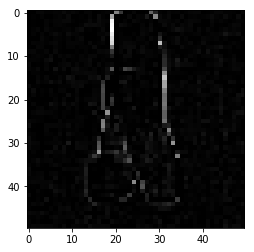

In [8]:
plt.imshow(cv2.resize(lXX[37],(50,50)),'gray')
plt.show()

In [72]:
c = np.copy(XX)

In [73]:
for i in range(len(c)-1):
    c[i] = c[i+1]-c[i]

array([  0,   0, 255,   0,   0, 255, 254, 255, 254, 254, 254, 254, 254,
       254, 253, 254, 254, 254, 254, 254, 254, 254, 255, 255, 255, 255,
       255,   0,   0,   0,   0, 255, 255, 253, 254, 255,   1,   1,   1,
         2,   2,   2,   1,   1,   0,   0,   0,   0,   0,   0,   1,   1,
         2,   2,   8,  60,  77,  63,  36,  18,   7, 252, 249, 248, 252,
       250, 250, 251, 252,   5,   0, 255,   3,   5,   6,   5,   5,   6,
         6,   8,  10,  11,  14,  14,  12,  15,  17,  15,  10,   3,   2,
         1, 255, 251, 250, 242, 229, 164, 138, 142, 185, 243, 247, 249,
       249, 248, 243, 243, 243, 245, 245, 247, 246, 247, 247, 248, 248,
       250, 250, 251, 252, 252, 252, 252, 252, 252, 252, 250, 249, 249,
       248, 247, 246, 245, 244, 245, 245, 246, 247, 249, 250, 251, 254,
         0,   2,   3,   5,   3,   3,   1,   1,   2,   0, 254, 253, 252,
       251, 251, 252, 253], dtype=uint8)

In [76]:
z = []

In [77]:
for i in range(len(c)):
    if sum(sum(c[i]/c[i].shape[1]))/(c[i].shape[0]) > 20:
        z.append(i)

In [79]:
len(z)

551

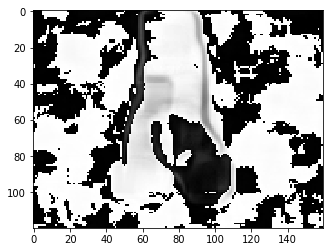

In [82]:
plt.imshow(c[38],'gray')
plt.show()

In [111]:
a = [1,   1,   2,   1,   1,   2,   3,   3,   4,   4,   4,   4,   4,
         4,   5,   4,   4,   4,   4,   4,   4,   4,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   4,   4,   5,   4,   3,   2,   2,   1,
         1,   1,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   2,
         2,   2,   3,   4,   2,  23,  55,  76,  89, 103, 109, 112, 111,
       114, 115, 116, 121, 121, 130, 133, 133, 133, 134, 135, 135, 135,
       136, 137, 137, 137, 136, 137, 141, 141, 141, 142, 146, 148, 148,
       148, 149, 148, 148, 148, 148, 150, 140, 128,  84,  23,  16,  12,
         9,   9,  13,  13,  13,  12,  12,  10,  11,  10,   9,   9,   9,
         7,   7,   6,   5,   5,   5,   5,   5,   5,   5,   7,   8,   8,
         9,  10,  11,  12,  13,  12,  12,  11,  10,   9,   8,   7,   5,
         3,   2,   1,   0,   2,   3,   5,   5,   4,   6,   7,   7,   8,
         9,   9,   9,   8] * 200
a = np.array(a)
a = a.reshape((int(a.shape[0]/200), 200))

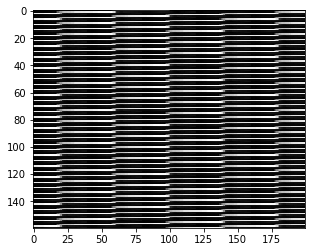

In [112]:
plt.imshow(a,'gray')
plt.show()

In [3]:
import sys
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05}

video = cv2.VideoCapture("test.avi")
x = []
while True:
    ret, frame = video.read()
    if not ret:
        break

    result = hog.detectMultiScale(frame, **hogParams)
    x.append(result)

In [6]:
x = np.array(x)

In [7]:
x.shape

(555, 2)

In [8]:
x.flatten()

array([(), (), (), ..., (), (), ()], dtype=object)

In [12]:
x.ravel()

array([(), (), (), ..., (), (), ()], dtype=object)

In [13]:
A = np.squeeze(np.asarray(x))

In [14]:
A

array([[(), ()],
       [(), ()],
       [(), ()],
       ...,
       [(), ()],
       [(), ()],
       [(), ()]], dtype=object)